In [1]:
import os
from dotenv import load_dotenv
import importlib

load_dotenv()

bot_token = os.getenv("SLACK_BOT_TOKEN")
app_token = os.getenv("SLACK_APP_TOKEN")

if not bot_token or not app_token:
    raise ValueError("Missing Slack tokens in environment variables.")

In [2]:
from data_loaders.sitemap_entry import Sitemap

sitemap = Sitemap(sitemap="https://tech.appunite.com/blog/blog-sitemap.xml")
sitemap_entries = sitemap.load()

urls = [entry.url for entry in sitemap_entries]

In [4]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(
    model="text-embedding-3-small"
)

vector_db = Chroma(
    persist_directory="./vector_db",
    embedding_function=embeddings,
    collection_metadata={"hnsw:space": "cosine"}
)

In [7]:
from data_loaders import document_processor
importlib.reload(document_processor)
from data_loaders.document_processor import DocumentProcessor

document_processor = DocumentProcessor(vector_db=vector_db)
document_processor.load_and_index_documents(urls=urls)

Error processing https://tech.appunite.com/blog/why-should-you-consider-using-flutter-for-your-next-mobile-project: 404 Client Error: Not Found for url: https://web.appunite.com/blog/why-should-you-consider-using-flutter-for-your-next-mobile-project?redirected=true
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/google-i-o-2024-keynote-announcements
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/enable-bitcode-flag-in-unity
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/how-to-build-great-software-products
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/scrum-defaults-not-rules
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/choosing-the-right-software-development-company-to-build-your-app
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/most-common-mobile-testing-problems
Error processing https://tech.appunite.com/blog/are-you-asking-yourself-why-customized-e-


Collection Name: langchain
dict_keys(['ids', 'embeddings', 'documents', 'uris', 'data', 'metadatas', 'included'])
Unique URLS: 77
Total documents: 808

Total length: 610530
Average length: 755.6064356435644
Max length: 999

Total tokens: 133071
Average tokens: 164.69183168316832
Max tokens: 313


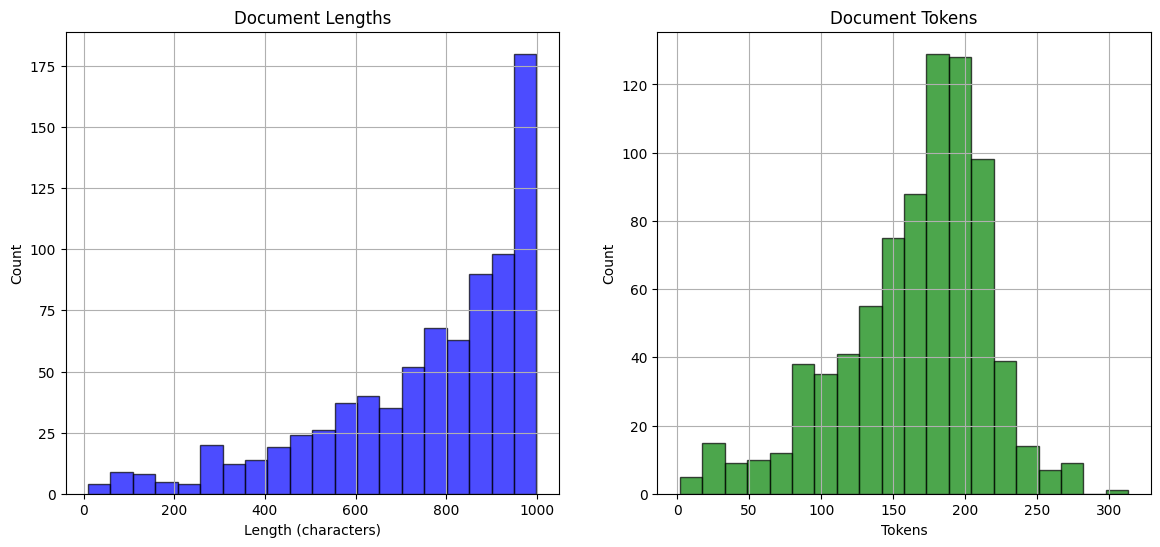

In [42]:
import tiktoken
import matplotlib.pyplot as plt
import pandas as pd 

def count_tokens(text, model="gpt-3.5-turbo"):
    encoding = tiktoken.encoding_for_model(model)
    tokens = encoding.encode(text)
    return len(tokens)

docs = document_processor.get_docs()[0]['langchain']
print(docs.keys())
print(f"Unique URLS: {len(set([metadata['source'] for metadata in docs['metadatas']]))}")

lengths = [len(doc) for doc in docs['documents']]
tokens = [count_tokens(doc) for doc in docs['documents']]


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
pd.Series(lengths).hist(bins=20, alpha=0.7, color='blue', edgecolor='black', ax=axes[0])
axes[0].set_title('Document Lengths')
axes[0].set_xlabel('Length (characters)')
axes[0].set_ylabel('Count')

pd.Series(tokens).hist(bins=20, alpha=0.7, color='green', edgecolor='black', ax=axes[1])
axes[1].set_title('Document Tokens')
axes[1].set_xlabel('Tokens')
axes[1].set_ylabel('Count')


print(f"Total documents: {len(lengths)}\n")

print(f"Total length: {sum(lengths)}")
print(f"Average length: {sum(lengths)/len(lengths)}")
print(f"Max length: {max(lengths)}\n")

print(f"Total tokens: {sum(tokens)}")
print(f"Average tokens: {sum(tokens)/len(tokens)}")
print(f"Max tokens: {max(tokens)}")

In [43]:
from rag_query.query_handler import QueryHandler

rag_system = QueryHandler(
    vector_db=vector_db
)

ChromaDB initialized successfully. Document count: 808


In [ ]:
query = "We're discussing with a prospect client that wants to implement an AI feature in the app. Please show me article about our experience and knowledge"
answer = rag_system.get_answer(query)

In [46]:
for i, doc in enumerate(answer):
    print(f"****** {i + 1} ******\n"
          f"URL: {doc['url']}\n"
          f"Analysis: {doc['analysis']}\n")

****** 1 ******
URL: https://tech.appunite.com/blog/how-to-introduce-yourself-to-new-team
Analysis: The article discusses how to effectively introduce yourself to a new team, highlighting the importance of making a good first impression. It emphasizes that your introduction should focus on what you can contribute to the team rather than just listing your achievements. The article provides tips on crafting a thoughtful "hello" message, being respectful and positive about the team, and showing willingness to help. It also advises against being overly modest or critical, while encouraging a friendly and human touch in your communication.

The article does not provide information about implementing AI features in an app or your experience and knowledge in that area.

****** 2 ******
URL: https://tech.appunite.com/blog/absence-bot-au
Analysis: The article discusses the development of AbsenceBot, a chatbot created by AppUnite to streamline the process of managing employee absences. Previousl